# Next-Event Simulation Assignment
### Year 2018-2019  - Semester II
### CCE3501 / CCE3502
#### Developed by - Adrian Muscat, 2019
---

Matthew Vella, 0428698M , BSc CS, Yr II




In this assignment you will be implementing next-event simulations for systems involving queues and service nodes in resource allocation systems.


#### Tasks and Questions  (repeated below at the appropriate position)
1. You are given a ready-coded single server queuing system simulation. Go through the code and note the event service routines, timing routine, iat and st generators, etc.
2. Develop a function to plot the queue length versus time 
3. Develop functions to calculate the average queue length, average interarrival rate and server utilisation. 
4. Compare the answers in 3 to the M/M/1 analytical model
5. modify the event routines (re-write new ones) to model a resource allocation system without queuing, i.e if a customer calls and the server is busy, the customer is blocked.
6. Plot the blocking rate versus number of servers (N=1, 2, 3 .... 20)
7. Add a buffer of finite size to the resource allocation system, such that when a customer calls and the server is busy, the customer is queued.
8. Plot the blocking rate versus buffer size.




In [16]:
import random, math
import numpy as np
import matplotlib.pyplot as plt
# import scipy.stats as stats

In [17]:
# this line plots graphs in line
%matplotlib inline

## 1. Below is a ready-coded single server queuing system simulation. Go through the code and note the event service routines, timing routine, iat and st generators, etc.


In [18]:
fileOutA=True   # Flag, if true output to file
stateList=[]    # List containing [q(t), s(t), time]
servTimeList=[]
eventList=[]    # Event calendar list
notice=[]       # notice = [ notice number, time, type ]
                # type = 0, arrival
                # type = 1, begin service
                # type = 2, end service
now = 0.0       # Simulation time
Q = 0           # Queue Length, Q=0 when empty
S=0             # Server State 0=idle, 1=busy
EN=0            # Event Notice Number
avgintarrtimeList = [] #list for accumulating interarrival time

In [19]:
def ScheduleEventNotice(notice):
    global eventList
    if len(eventList)==0:
        eventList.append(notice)
    elif len(eventList)==1:
        if eventList[0][1] <= notice[1]:
            eventList.append(notice)
        else:
            eventList.insert(0,notice)
    elif eventList[len(eventList)-1][1] < notice[1]:
        eventList.append(notice)
    else:
        i=0
        while (eventList[i][1]<=notice[1] and i<(len(eventList)-1)):
            i += 1
        eventList.insert(i,notice)

In [20]:
def DisplayEventList(header):
    print (header)
    i=0
    while i<len(eventList):
        print (eventList[i])
        i += 1

def writeToFile():
    #print 'Q = ',Q, '   S = ',S, '   now = ', now
    stateEntry = [Q, S, now]
    stateList.append(stateEntry)

def DisplayStateList(header):
    print (header)
    i=0
    while i<len(stateList):
        print (stateList[i])
        i += 1

In [21]:
def InterArrivalTime():
    #return -10*math.log(random.random())
    return np.random.exponential()*8.001


def ServiceTime():
    #return -8*math.log(random.random())
    return np.random.exponential()*8

In [22]:
def EventRoutineArrival():
    global EN, Q, S
    EN=EN+1
    intarrivaltime = InterArrivalTime()
    avgintarrtimeList.append(intarrivaltime)
    eventTime = now+intarrivaltime
    #notice=[EN+1, now+InterArrivalTime(), 0]
    notice=[EN, eventTime, 0]
    ScheduleEventNotice(notice)
    Q = Q + 1
    if S==0:
        EN+=1
        notice=[EN, now, 1]
        ScheduleEventNotice(notice)
    if fileOutA: writeToFile()        

In [23]:
def EventRoutineBeginService():
    global EN, Q, S
    Q = Q - 1  
    S = 1
    EN+=1
    sT = ServiceTime()
    servTimeList.append(sT)
    eventTime = now+sT
    notice=[EN, eventTime, 2]
    ScheduleEventNotice(notice)
    if fileOutA: writeToFile()

In [24]:
def EventRoutineEndService():
    global EN, Q, S
    S=0
    if Q>0:
        EN=EN+1
        eventTime = now
        notice = [EN, eventTime, 1]
        ScheduleEventNotice(notice)
    if fileOutA: writeToFile()

In [25]:
# Schedule arrival event at time NOW;
notice=[EN, now, 0]
ScheduleEventNotice(notice)

print ('Start of Simulation run')

while (eventList!=[] and now<2000): #200000
    now = eventList[0][1]
    #print now,'   ',eventList[0]
    #print 'Q = ',Q, '   S = ',S
    #DisplayEventList('Hello')
    if eventList[0][2]==0:
        EventRoutineArrival()
    elif eventList[0][2]==1:
        EventRoutineBeginService()
    elif eventList[0][2]==2:
        EventRoutineEndService()
    else:
        print ('Unknown event type')
    #Remove first notice
    eventList.pop(0)

print ('End of Simulation run')

Start of Simulation run
End of Simulation run


# GRADED QUESTIONS BELOW: 7 questions, Total = 70, weight =15%

## 2. Develop a function to plot the queue length versus time  [5 marks]


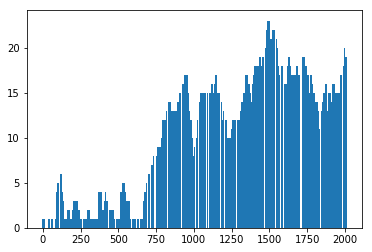

In [26]:
x = np.array(stateList)
plt.bar(x[:,2],x[:,0], width=10,align='center')
plt.show()

## 3. Develop functions to calculate the average queue length, average interarrival rate, server utilisation and mean waiting time. [10 marks]


In [39]:
def avgQlength():
    x = np.array(stateList)
    extracted = x[:,0]
    b = sum(extracted)
    avgQueueLength = b/len(extracted)
    return avgQueueLength  

def avgservice():
    sum = 0
    for i in range(1000):
        x = ServiceTime()
        sum += x
        
    avgservicerate = sum/1000
    return avgservicerate

def avgIrate():
    sum = 0
    for i in range(1000):
        x = InterArrivalTime()
        sum += x 
        
    avgArrivalRate = sum/1000
    return avgArrivalRate

def serverUtil(a,b):
    #ρ = lambda/mu   = row = 1/mean rate of arrival / 1/mean service rate 
    x = (1/a) / (1/b)
    print(x)
    
def meanWaitingT():
    x = np.array(stateList)
    extracted = x[:,2]
    b = sum(extracted)
    answer = b/len(extracted)
    print(answer)

    
avgservice = avgservice()  

In [40]:
#Question 1 
print(avgQLen)

9.789877300613497


In [41]:
#Question 2
print(avgArrivalRate)

8.005255367886113


In [42]:
#Question 3 
serverUtil(avgArrivalRate,avgservice)

0.9926755393901777


In [43]:
#Question4 
meanWaitingT()

1004.2780049277006


## 4. Compare the answers in 3 to the M/M/1 analytical model [5 marks]

In [44]:
#M/M/1:
#L = p^2/1-p 
#L = mean no of customers
#ρ = server utilization = (1/mean rate of arrivals)/(1/mean service rate) 
# lambda = 1/interarrival time
# mu = 1/servicetime
    
    
def avgQlength():
    x = np.array(stateList)
    extracted = x[:,0]
    b = sum(extracted)
    avgQueueLength = b/len(extracted)
    return avgQueueLength  

def avgIrate():
    sum = 0
    for i in range(1000):
        x = InterArrivalTime()
        sum += x 
        
    avgArrivalRate = sum/1000
    return avgArrivalRate

def avgservice():
    sum = 0
    for i in range(1000):
        x = ServiceTime()
        sum += x
        
    avgservicerate = sum/1000
    return avgservicerate

def serverUtil(a,b):
    #ρ = lambda/mu   = row = 1/mean rate of arrival / 1/mean service rate 
    x = (1/a) / (1/b)
    return x


def meanWaitingT():
    x = np.array(stateList)
    extracted = x[:,2]
    b = sum(extracted)
    answer = b/len(extracted)
    return (answer)


#M/M/1 model to compare with average queue length
def MM1meancustomers(b):
    x = (b**2)/(1-b)
    return x

#M/M/1 model to compare with average waiting time, wait in queue = mean no of customers/lambda
def MM1meanwaiting(a,b):
    c = 1/b
    x = a/c
    return x

avgservice = avgservice()  
avgArrivalRate = avgIrate()
A = serverUtil(avgArrivalRate,avgservice)    
avgQLen = avgQlength()  
meanwaitrate = meanWaitingT()

B = MM1meancustomers(A)
C = MM1meanwaiting(B,avgArrivalRate)

In [47]:
print(B)

20.4117639572627


In [48]:
print(C)

166.37656658931732


## 5. Modify the appropriate functions (re-write new ones) to model a resource allocation system (with N servers) without queuing, i.e if a customer calls and all servers are busy, the customer is blocked. Set mean iat = 5, mean service rate =170 and N=8. Run the simulation and compute the blocking rate. [10 marks]


In [19]:
blockedCustomers = 0

endedCustomers = 0

In [20]:
fileOutA=True   # Flag, if true output to file
stateList=[]    # List containing [q(t), s(t), time]
servTimeList=[]
eventList=[]    # Event calendar list
notice=[]       # notice = [ notice number, time, type ]
                # type = 0, arrival
                # type = 1, begin service
                # type = 2, end service
now = 0.0       # Simulation time
#Q = 0           # Queue Length, Q=0 when empty
S=0             # No of Servers occupied
EN=0            # Event Notice Number
avgintarrtimeList = [] #list for accumulating interarrival time
n=0             #no of servers

In [21]:
def ScheduleEventNotice(notice):
    global eventList
    if len(eventList)==0:
        eventList.append(notice)
    elif len(eventList)==1:
        if eventList[0][1] <= notice[1]:
            eventList.append(notice)
        else:
            eventList.insert(0,notice)
    elif eventList[len(eventList)-1][1] < notice[1]:
        eventList.append(notice)
    else:
        i=0
        while (eventList[i][1]<=notice[1] and i<(len(eventList)-1)):
            i += 1
        eventList.insert(i,notice)

In [22]:
def DisplayEventList(header):
    print (header)
    i=0
    while i<len(eventList):
        print (eventList[i])
        i += 1

def writeToFile():
    #print 'Q = ',Q, '   S = ',S, '   now = ', now
    stateEntry = [Q, S, now]
    stateList.append(stateEntry)

def DisplayStateList(header):
    print (header)
    i=0
    while i<len(stateList):
        print (stateList[i])
        i += 1

In [23]:
def InterArrivalTime():
    #return -10*math.log(random.random())
    return np.random.exponential()*5


def ServiceTime():
    #return -8*math.log(random.random())
    return np.random.exponential()*170

In [24]:
def EventRoutineArrival(n):
    global EN, Q, S, blockedCustomers
    EN=EN+1
    intarrivaltime = InterArrivalTime()
    avgintarrtimeList.append(intarrivaltime)
    eventTime = now+intarrivaltime
    #notice=[EN+1, now+InterArrivalTime(), 0]
    notice=[EN, eventTime, 0]
    ScheduleEventNotice(notice)
    Q = Q + 1
    if (S >= n):
        blockedCustomers+=1
    else:
        notice=[EN, now, 1]
        ScheduleEventNotice(notice)
    if fileOutA: writeToFile() 
    

In [25]:
def EventRoutineBeginService():
    global EN, Q, S
    S += 1
    EN+=1
    sT = ServiceTime()
    servTimeList.append(sT)
    eventTime = now+sT
    notice=[EN, eventTime, 2]
    ScheduleEventNotice(notice)
    if fileOutA: writeToFile()

In [26]:
def EventRoutineEndService():
    global EN, Q, S, endedCustomers
    endedCustomers += 1
    S-=1
    if fileOutA: writeToFile()

In [27]:
# Schedule arrival event at time NOW;
n = 8
notice=[EN, now, 0]
ScheduleEventNotice(notice)

print ('Start of Simulation run')

while (eventList!=[] and now<200): #200000
    now = eventList[0][1]
    #print now,'   ',eventList[0]
    #print 'Q = ',Q, '   S = ',S
    #DisplayEventList('Hello')
    if eventList[0][2]==0:
        EventRoutineArrival(n)
    elif eventList[0][2]==1:
        EventRoutineBeginService()
    elif eventList[0][2]==2:
        EventRoutineEndService()
    else:
        print ('Unknown event type')
    #Remove first notice
    eventList.pop(0)

print ('End of Simulation run')
print ('Blocking rate is {b}/{e}'.format(b=blockedCustomers,e = endedCustomers+blockedCustomers))

Start of Simulation run
End of Simulation run
Blocking rate is 27/33


(61,) (61,) (61,)


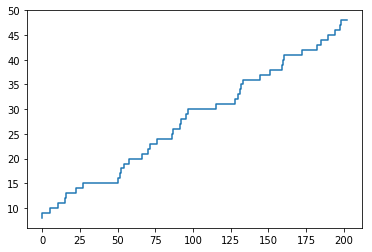

Average queue length is equal to : 27.9015406285575
Average interarrival time: 5.007706514138418


In [28]:
b = np.asarray(stateList)
x1=b[:,2]
y1=b[:,0]
y12=b[:,1]
#n=8
print(np.shape(x1),np.shape(y1),np.shape(y12))
#PlotQueueLengthVSTime(x1,y1)
AvgQueueLen(x1,y1)
AvgIntArrivalTime(x1,y1)


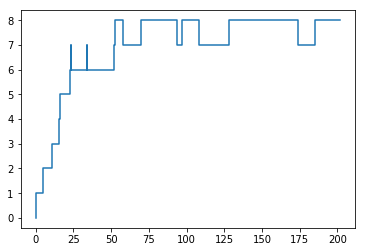

1395.3963946411761
201.84930481368062
Server util is equal to : 0.8641325244649797


In [29]:
ServerUtil(x1,y12,8)

## 6. Plot the blocking rate versus number of servers (N=1, 2, 3 .... 50) [10 marks]

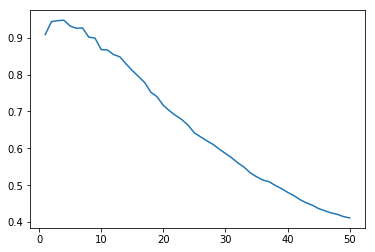

In [30]:
i = 0
blockingRate = []
servers = []
while (i<50):
    fileOutA=True   # Flag, if true output to file
    stateList=[]    # List containing [q(t), s(t), time]
    servTimeList=[]
    eventList=[]    # Event calendar list
    notice=[]       # notice = [ notice number, time, type ]
                    # type = 0, arrival
                    # type = 1, begin service
                    # type = 2, end service
    now = 0.0       # Simulation time
    #Q = 0           # Queue Length, Q=0 when empty
    S=0             # No of Servers occupied
    EN=0            # Event Notice Number
    avgintarrtimeList = [] #list for accumulating interarrival time
    n=i
    notice=[EN, now, 0]
    ScheduleEventNotice(notice)

    #print ('Start of Simulation run')

    while (eventList!=[] and now<200): #200000
        now = eventList[0][1]
        #print now,'   ',eventList[0]
        #print 'Q = ',Q, '   S = ',S
        #DisplayEventList('Hello')
        if eventList[0][2]==0:
            EventRoutineArrival(n)
        elif eventList[0][2]==1:
            EventRoutineBeginService()
        elif eventList[0][2]==2:
            EventRoutineEndService()
        else:
            print ('Unknown event type')
        #Remove first notice
        eventList.pop(0)

    #print ('End of Simulation run')
    #print ('Blocking rate is {b}/{e}'.format(b=blockedCustomers,e = endedCustomers+blockedCustomers))
    blockingRate.append(blockedCustomers/(endedCustomers+blockedCustomers))
    servers.append(i+1)
    i+=1
#print (blockingRate)
#print (servers)
plt.plot(servers,blockingRate)

## 7. Add a buffer of finite size to the resource allocation system, such that when a customer calls and the server is busy, the customer is queued. [5 marks]


In [46]:
fileOutA=True   # Flag, if true output to file
stateList=[]    # List containing [q(t), s(t), time]
servTimeList=[]
eventList=[]    # Event calendar list
notice=[]       # notice = [ notice number, time, type ]
                # type = 0, arrival
                # type = 1, begin service
                # type = 2, end service
now = 0.0       # Simulation time
Q = 0           # Queue Length, Q=0 when empty
S=0             # Server State 0=idle, 1=busy
EN=0            # Event Notice Number
avgintarrtimeList = [] #list for accumulating interarrival time
buffersize = 20
n=0             #no of servers
enteredCustomers = 0

In [47]:
def ScheduleEventNotice(notice):
    global eventList
    if len(eventList)==0:
        eventList.append(notice)
    elif len(eventList)==1:
        if eventList[0][1] <= notice[1]:
            eventList.append(notice)
        else:
            eventList.insert(0,notice)
    elif eventList[len(eventList)-1][1] < notice[1]:
        eventList.append(notice)
    else:
        i=0
        while (eventList[i][1]<=notice[1] and i<(len(eventList)-1)):
            i += 1
        eventList.insert(i,notice)

In [48]:
def DisplayEventList(header):
    print (header)
    i=0
    while i<len(eventList):
        print (eventList[i])
        i += 1

def writeToFile():
    #print 'Q = ',Q, '   S = ',S, '   now = ', now
    stateEntry = [Q, S, now]
    stateList.append(stateEntry)

def DisplayStateList(header):
    print (header)
    i=0
    while i<len(stateList):
        print (stateList[i])
        i += 1

In [49]:
def InterArrivalTime():
    #return -10*math.log(random.random())
    return np.random.exponential()*14


def ServiceTime():
    #return -8*math.log(random.random())
    return np.random.exponential()*7

In [50]:
def EventRoutineArrival(n,b):
    global EN, Q, S, blockedCustomers, enteredCustomers#buffersize
    EN=EN+1
    enteredCustomers+=1
    intarrivaltime = InterArrivalTime()
    avgintarrtimeList.append(intarrivaltime)
    eventTime = now+intarrivaltime
    #notice=[EN+1, now+InterArrivalTime(), 0]
    notice=[EN, eventTime, 0]
    ScheduleEventNotice(notice)
    Q = Q + 1
    
    if S<n and Q<=b: # if idle
        
        if(b > 0):
            Q += 1
        EN += 1
        notice=[EN, now, 1]
        ScheduleEventNotice(notice)
    elif Q<b:
        Q += 1
    else:
        blockedCustomers += 1
        
    if fileOutA: writeToFile() 
    

In [51]:
def EventRoutineBeginService():
    global EN, Q, S
    Q = Q - 1
    S += 1
    EN+=1
    sT = ServiceTime()
    servTimeList.append(sT)
    eventTime = now+sT
    notice=[EN, eventTime, 2]
    ScheduleEventNotice(notice)
    if fileOutA: writeToFile()

In [52]:
def EventRoutineEndService():
    global EN, Q, S, endedCustomers
    endedCustomers += 1
    S-=1
    if Q>0:
        EN=EN+1
        eventTime = now
        notice = [EN, eventTime, 1]
    if fileOutA: writeToFile()
    

In [53]:
# Schedule arrival event at time NOW;
buffersize = 8

# def WithBufferSize(b):
#     global stateList, servTimeList, eventList, notice, now, Q, S, EN, avgintarrtimeList, buffersize, n
# #     fileOutA=True   # Flag, if true output to file
#     stateList=[]    # List containing [q(t), s(t), time]
#     servTimeList=[]
#     eventList=[]    # Event calendar list
#     notice=[]       # notice = [ notice number, time, type ]
#                     # type = 0, arrival
#                     # type = 1, begin service
#                     # type = 2, end service
#     now = 0.0       # Simulation time
#     Q = 0           # Queue Length, Q=0 when empty
#     S=0             # Server State 0=idle, 1=busy
#     EN=0            # Event Notice Number
#     avgintarrtimeList = [] #list for accumulating interarrival time
#     buffersize = 0
#     n=0             #no of servers
#     enteredCustomers = 0
#     n = 8

notice=[EN, now, 0]
ScheduleEventNotice(notice)

print ('Start of Simulation run')

while (eventList!=[] and now<2000): #200000
    now = eventList[0][1]
    #print now,'   ',eventList[0]
    #print 'Q = ',Q, '   S = ',S
    #DisplayEventList('Hello')
    if eventList[0][2]==0:
        EventRoutineArrival(n,buffersize)
    elif eventList[0][2]==1:
        EventRoutineBeginService()
    elif eventList[0][2]==2:
        EventRoutineEndService()
    else:
        print ('Unknown event type')
    #Remove first notice
    eventList.pop(0)

print ('End of Simulation run')



Start of Simulation run
End of Simulation run


In [54]:
# WithBufferSize(buffersize)

(152,) (152,) (152,)


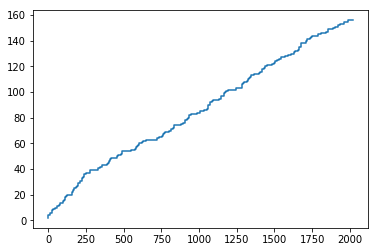

Average queue length is equal to : 86.62430650303934
Average interarrival time: 13.300819866764009


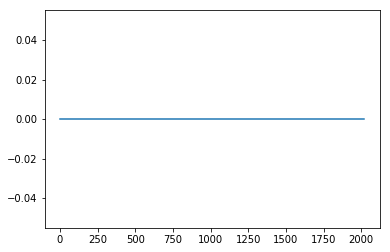

0.0
2020.1782176634374
Server util is equal to : nan


C:\Users\matth\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in double_scalars


In [55]:
c = np.asarray(stateList)
x1=c[:,2]
y1=c[:,0]
y12=c[:,1]
#n=8
print(np.shape(x1),np.shape(y1),np.shape(y12))
#PlotQueueLengthVSTime(x1,y1)
AvgQueueLen(x1,y1)
AvgIntArrivalTime(x1,y1)
ServerUtil(x1,y12,n)
#print ((blockedCustomers,(enteredCustomers)))

## 8. Plot the blocking rate versus buffer size. [5 marks]

Blocking rate is 20/20
Blocking rate is 15/16
Blocking rate is 17/19
Blocking rate is 12/15
Blocking rate is 10/14
Blocking rate is 9/14
Blocking rate is 8/14
Blocking rate is 12/19
Blocking rate is 7/15
Blocking rate is 7/16
Blocking rate is 8/18
Blocking rate is 3/14
Blocking rate is 7/19
Blocking rate is 5/18
Blocking rate is 4/18
Blocking rate is 6/21
Blocking rate is 5/21
Blocking rate is 1/18
Blocking rate is 0/18
Blocking rate is 0/15
Blocking rate is 0/14
Blocking rate is 0/16
Blocking rate is 0/15
Blocking rate is 0/11
Blocking rate is 0/15
Blocking rate is 0/11
Blocking rate is 0/14
Blocking rate is 0/14
Blocking rate is 0/17
Blocking rate is 0/21
Blocking rate is 0/14
Blocking rate is 0/26
Blocking rate is 0/8
Blocking rate is 0/13
Blocking rate is 0/15
Blocking rate is 0/18
Blocking rate is 0/18
Blocking rate is 0/15
Blocking rate is 0/22
Blocking rate is 0/16
Blocking rate is 0/11
Blocking rate is 0/14
Blocking rate is 0/19
Blocking rate is 0/15
Blocking rate is 0/10
Block

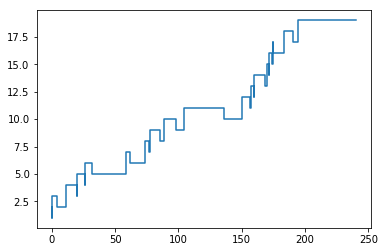

Average queue length is equal to : 11.06174509413068


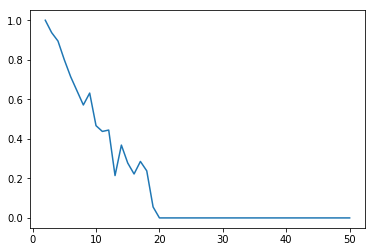

In [41]:
i = 1
n=8
buffersize = 0
#blockedCustomers = 0

blockingRate = []
buffersizePerRun = []

while (i<50):
    fileOutA=True   # Flag, if true output to file
    stateList=[]    # List containing [q(t), s(t), time]
    servTimeList=[]
    eventList=[]    # Event calendar list
    notice=[]       # notice = [ notice number, time, type ]
                    # type = 0, arrival
                    # type = 1, begin service
                    # type = 2, end service
    now = 0.0       # Simulation time
    Q = 0           # Queue Length, Q=0 when empty
    S=0             # No of Servers occupied
    EN=0            # Event Notice Number
    avgintarrtimeList = [] #list for accumulating interarrival time
    blockedCustomers = 0
    enteredCustomers = 0
    notice=[EN, now, 0]
    ScheduleEventNotice(notice)
    #print ('Start of Simulation run')

    while (eventList!=[] and now<200): #200000
        now = eventList[0][1]
        #print now,'   ',eventList[0]
        #print 'Q = ',Q, '   S = ',S
        #DisplayEventList('Hello')
        if eventList[0][2]==0:
            EventRoutineArrival(n,buffersize)
        elif eventList[0][2]==1:
            EventRoutineBeginService()
        elif eventList[0][2]==2:
            EventRoutineEndService()
        else:
            print ('Unknown event type')
        #Remove first notice
        eventList.pop(0)

    #print ('End of Simulation run')
    print ('Blocking rate is {b}/{e}'.format(b=blockedCustomers,e = enteredCustomers))
    blockingRate.append((blockedCustomers/(enteredCustomers)))
    buffersizePerRun.append(i+1)
    i+=1
    buffersize+=1
d = np.asarray(stateList)
x1=d[:,2]
y1=d[:,0]
y12=d[:,1]
AvgIntArrivalTime(x1,y1)
AvgQueueLen(x1,y1)
#ServerUtil(x1,y12,50)
# print (blockingRate)
# print (servers)
plt.plot(buffersizePerRun,blockingRate)